# Shampoo

### 1. Análisis exploratorio

La serie muestra las ventas mensuales de shampoo:

-> Es una serie mensual con 36 datos.

-> Las ventas varían mes a mes, pero en general van aumentando con el tiempo.

-> Se observa una tendencia creciente, aunque con algunas fluctuaciones.

-> Aún no se identifica una estacionalidad clara.

Esta visualización permite ver el comportamiento general antes de aplicar técnicas de análisis.

Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1901-01-31 to 1903-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes
None

Primeras filas:

            Sales
Month            
1901-01-31  266.0
1901-02-28  145.9
1901-03-31  183.1
1901-04-30  119.3
1901-05-31  180.3

Estadísticas descriptivas:

            Sales
count   36.000000
mean   312.600000
std    148.937164
min    119.300000
25%    192.450000
50%    280.150000
75%    411.100000
max    682.000000

Rango de fechas:
1901-01-31  →  1903-12-31


/var/folders/sf/jqhvw22d6fd6t0q4sjk1pm9r0000gn/T/ipykernel_34087/3886745667.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='1901-01', periods=len(df), freq='M')


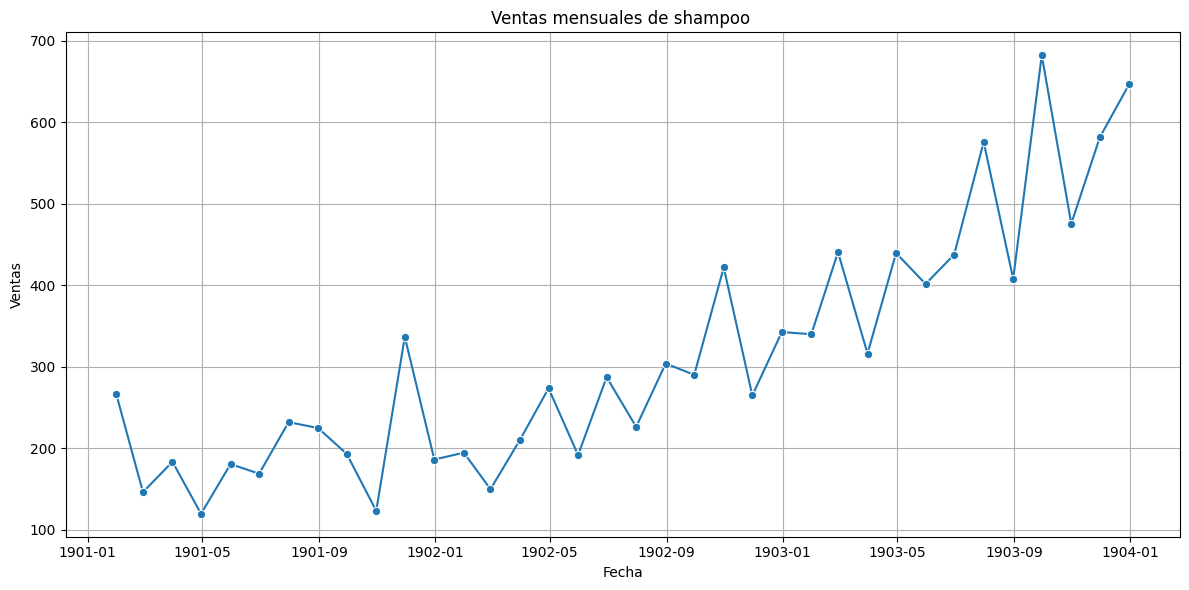

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("shampoo.csv")

df['Month'] = pd.date_range(start='1901-01', periods=len(df), freq='M')

df.set_index('Month', inplace=True)

print("Información del DataFrame:\n")
print(df.info())
print("\nPrimeras filas:\n")
print(df.head())
print("\nEstadísticas descriptivas:\n")
print(df.describe())
print("\nRango de fechas:")
print(f"{df.index.min().date()}  →  {df.index.max().date()}")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Sales', marker='o')
plt.title("Ventas mensuales de shampoo ")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2. Promedios Móviles

Comparación: Serie Original vs Promedios Móviles (3 meses y 6 meses)

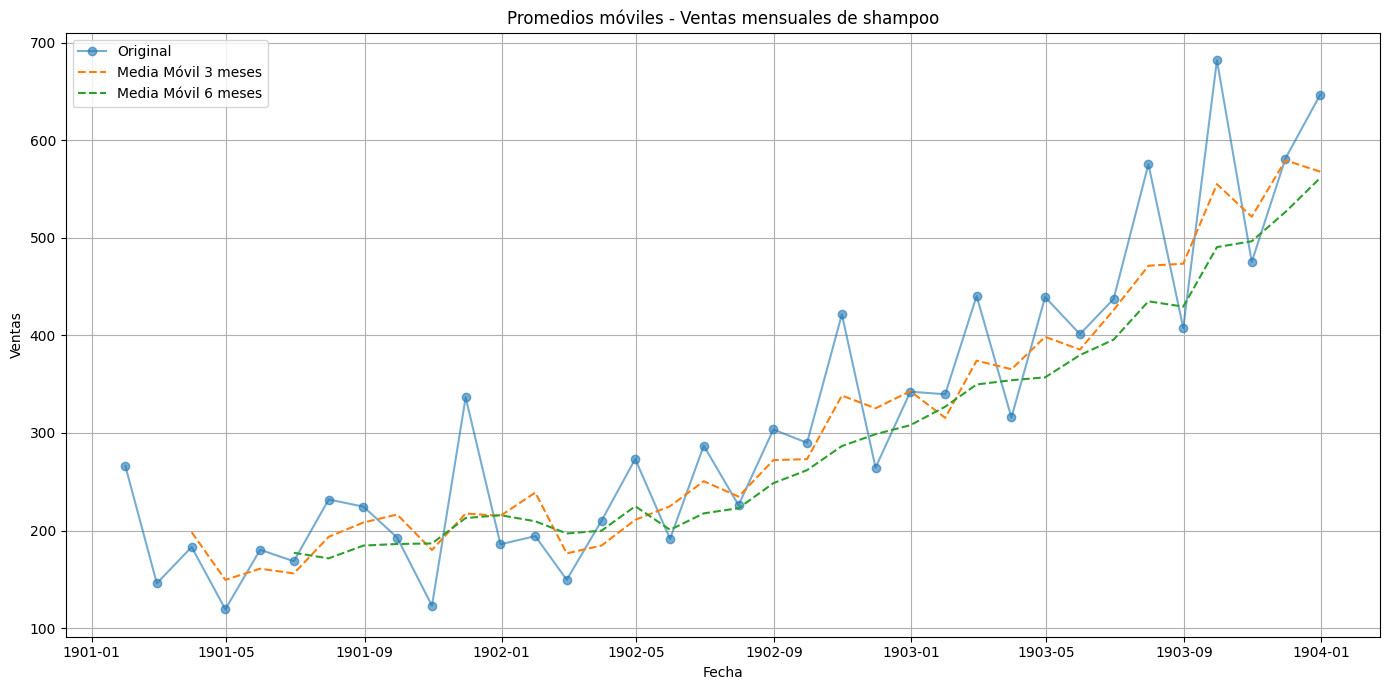

In [7]:
df['MA_3'] = df['Sales'].rolling(window=3).mean()
df['MA_6'] = df['Sales'].rolling(window=6).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Sales'], label='Original', marker='o', linestyle='-', alpha=0.6)
plt.plot(df.index, df['MA_3'], label='Media Móvil 3 meses', linestyle='--')
plt.plot(df.index, df['MA_6'], label='Media Móvil 6 meses', linestyle='--')
plt.title("Promedios móviles - Ventas mensuales de shampoo")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### Explicación:
-> MA_3: Promedio móvil de 3 meses (suaviza a corto plazo).

-> MA_6: Promedio móvil de 6 meses (suaviza más fuerte).

Comparamos con la serie original para ver cómo se eliminan fluctuaciones pequeñas y se revela la tendencia.



##### Comparación
-> La serie original muestra muchas subidas y bajadas.

-> La media móvil de 3 meses suaviza un poco, pero sigue el ritmo de los cambios.

-> La media móvil de 6 meses es más estable y revela mejor la tendencia general creciente.





### 3. Alisamiento exponencial

/var/folders/sf/jqhvw22d6fd6t0q4sjk1pm9r0000gn/T/ipykernel_34087/2600809232.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='1901-01', periods=len(df), freq='M')
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


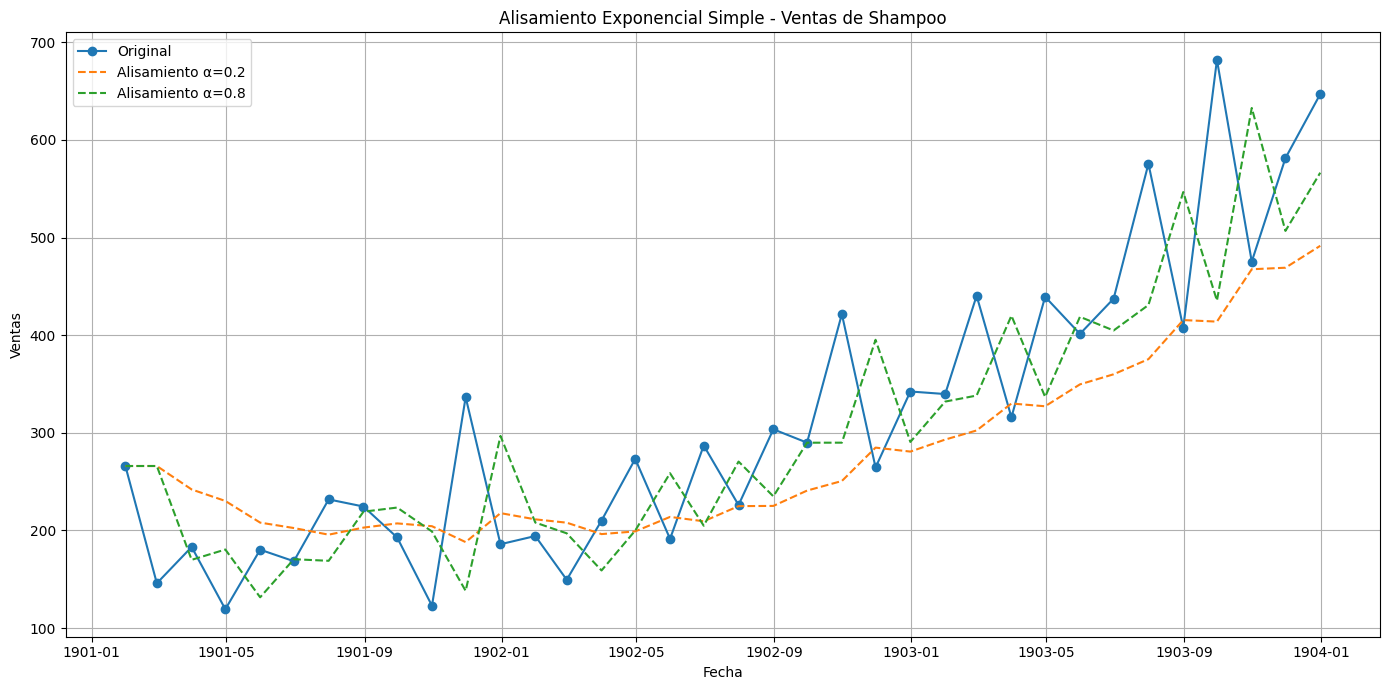

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df = pd.read_csv("shampoo.csv")
df['Month'] = pd.date_range(start='1901-01', periods=len(df), freq='M')
df.set_index('Month', inplace=True)
df_exp = df[['Sales']].dropna()

model = SimpleExpSmoothing(df_exp['Sales'])

fit_0_2 = model.fit(smoothing_level=0.2, optimized=False)
fit_0_8 = model.fit(smoothing_level=0.8, optimized=False)

df_exp['SES_0.2'] = fit_0_2.fittedvalues
df_exp['SES_0.8'] = fit_0_8.fittedvalues

plt.figure(figsize=(14, 7))
plt.plot(df_exp.index, df_exp['Sales'], label='Original', marker='o')
plt.plot(df_exp.index, df_exp['SES_0.2'], label='Alisamiento α=0.2', linestyle='--')
plt.plot(df_exp.index, df_exp['SES_0.8'], label='Alisamiento α=0.8', linestyle='--')
plt.title('Alisamiento Exponencial Simple - Ventas de Shampoo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### Comparación
-> La serie original (línea naranja) muestra muchas fluctuaciones.

-> El modelo con α = 0.2 reacciona más lento a los cambios → más suavizado.

-> El modelo con α = 0.8 sigue los cambios más de cerca, pero aún reduce el ruido.


Por lo tanto: A menor α, el modelo da más peso al pasado (tendencia estable) y a mayor α, el modelo da más peso al dato reciente (responde más rápido a cambios).




### 4. HOLT-WINTERS

/var/folders/sf/jqhvw22d6fd6t0q4sjk1pm9r0000gn/T/ipykernel_34087/272699797.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='1901-01', periods=len(df), freq='M')
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


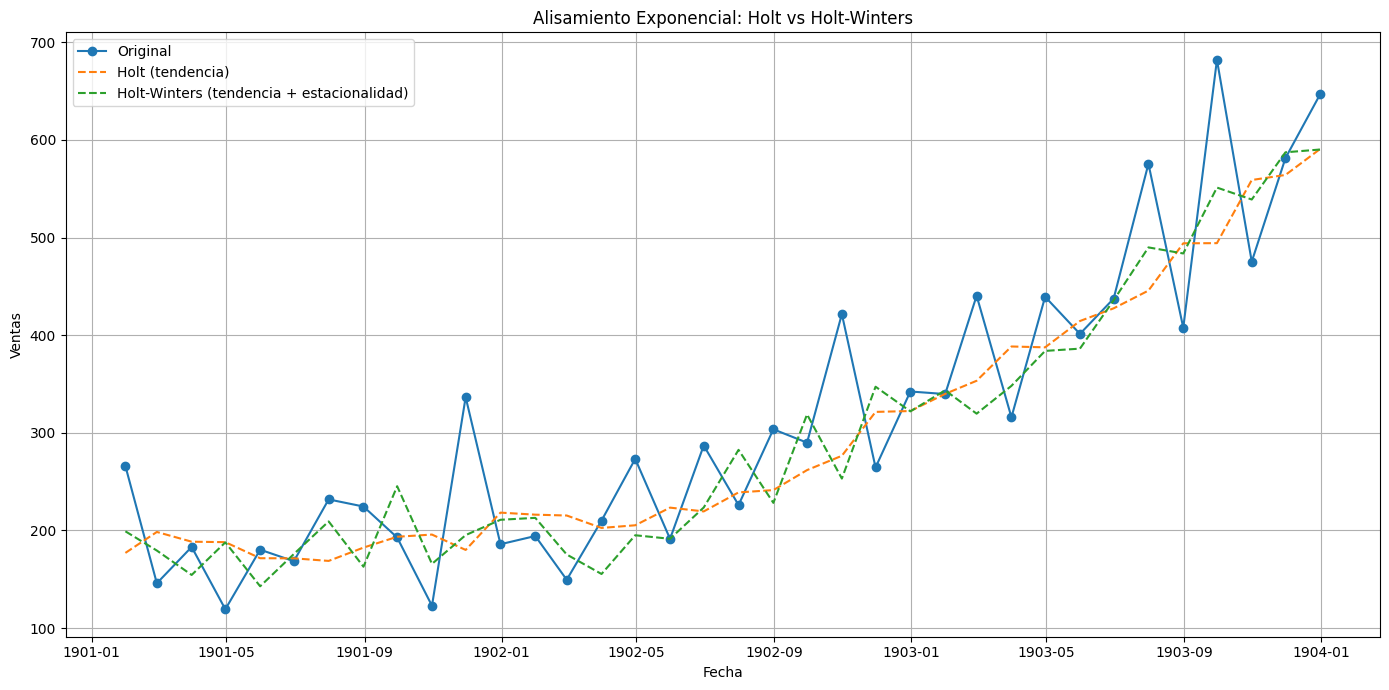

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = pd.read_csv("shampoo.csv")
df['Month'] = pd.date_range(start='1901-01', periods=len(df), freq='M')
df.set_index('Month', inplace=True)
holt = ExponentialSmoothing(df['Sales'], trend='add', seasonal=None).fit()
holt_winters = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['Holt'] = holt.fittedvalues
df['HoltWinters'] = holt_winters.fittedvalues

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Sales'], label='Original', marker='o')
plt.plot(df.index, df['Holt'], label='Holt (tendencia)', linestyle='--')
plt.plot(df.index, df['HoltWinters'], label='Holt-Winters (tendencia + estacionalidad)', linestyle='--')
plt.title("Alisamiento Exponencial: Holt vs Holt-Winters")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### Comparación rápida:
-> Holt considera solo la tendencia lineal → más suave.

-> Holt-Winters incluye estacionalidad + tendencia, y por eso ajusta mejor las variaciones mensuales.

Se puede observar que ambos suavizan la serie original, pero Holt-Winters capta mejor los picos y valles repetitivos

### 5. SARIMA

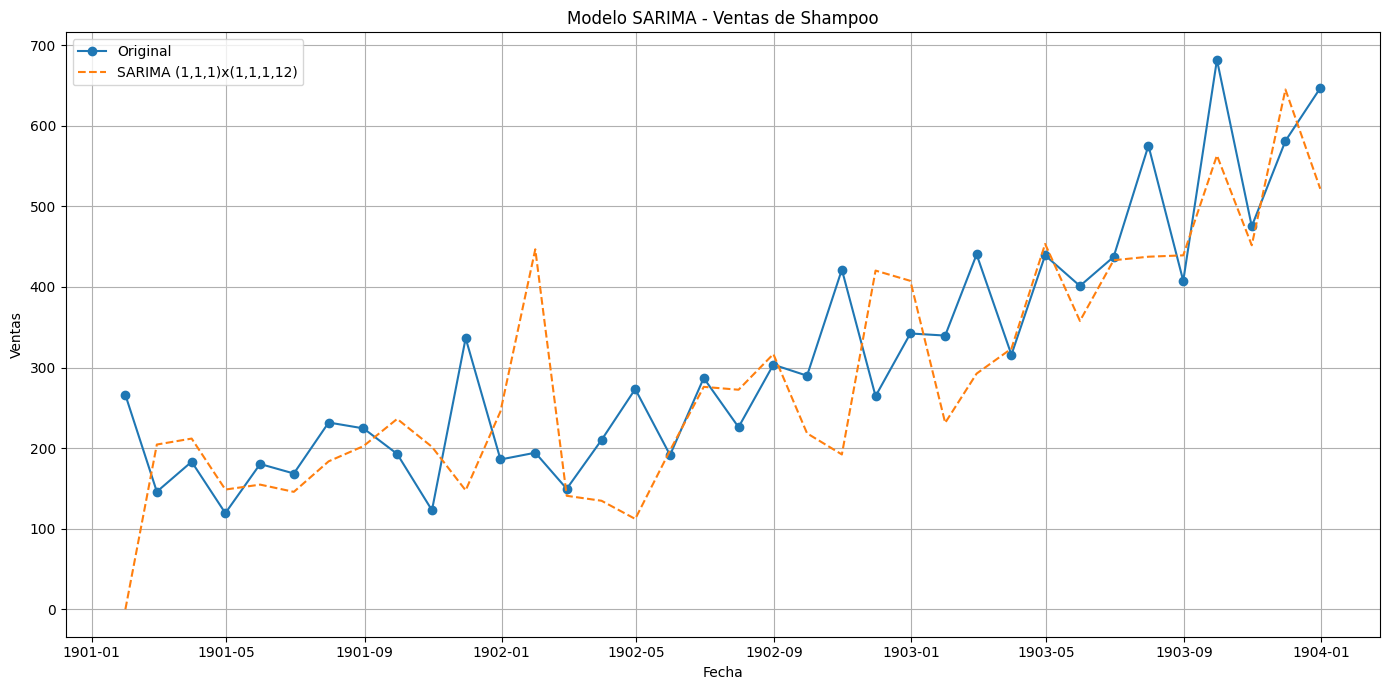

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv("shampoo.csv")
df['Month'] = pd.date_range(start='1901-01', periods=len(df), freq='M')
df.set_index('Month', inplace=True)

model = sm.tsa.statespace.SARIMAX(
    df['Sales'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

df['SARIMA_Fitted'] = model.fittedvalues

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Sales'], label='Original', marker='o')
plt.plot(df.index, df['SARIMA_Fitted'], label='SARIMA (1,1,1)x(1,1,1,12)', linestyle='--')
plt.title("Modelo SARIMA - Ventas de Shampoo")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Para modelar la serie de ventas de shampoo, se utilizó un modelo SARIMA, que nos permite capturar tanto la tendencia como la estacionalidad de la serie de tiempo.

##### Identificación de parámetros:
En lugar de hacer una búsqueda extensa (que puede tardar mucho tiempo), se seleccionaron parámetros comunes y efectivos para series mensuales como esta:

-> order = (1, 1, 1) → parte no estacional (ARIMA)

-> seasonal_order = (1, 1, 1, 12) → parte estacional con periodo de 12 (mensual)



##### Ajuste del modelo:
Se entrenó el modelo con estos parámetros, y luego se comparó la serie ajustada con los datos originales para observar la capacidad del modelo de seguir la tendencia y los patrones repetitivos.

### 6. Prophet

### 7. Comparación y Evaluación